### 6. The Future of Deep Learning
* 비감독(unsupervised learning)
    * 비감독이 감독학습보다 장기적인 측면에서 더 중요
    * 사람과 동물의 학습은 비감독 학습

* computer vision 
    * cnn 과 강화학습을 이용한 리커런트 뉴럴 네트워크(rnn)의 결합 시스템이 크게 발전
* natural language understanding
    * 히든유닛에서 이전 시퀀스의 앨리먼트를 기억하면서 한 번에 하나의 엘리먼트를 시퀀스 입력으로 처리
* 복잡한 추론을 통한 표현학습

### 참고자료
* Neural networks <br>
http://neuralnetworksanddeeplearning.com/chap1.html <br>
* SGD <br>
https://wikidocs.net/3413 <br>
* CNN <br>
https://cs231n.github.io/classification/ <br>
* 딥러닝 적용 사례 <br>
https://brunch.co.kr/@itschloe1/23 <br>
* 1장 <br>
http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/1장.ipynb <br>
* 2장 <br>
http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/2장.ipynb <br>
* 3장 <br>
http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/3장.ipynb <br>

* 밑바닥부터 시작하는 딥러닝 <br>
    https://nbviewer.org/github/SDRLurker/deep-learning/tree/master/


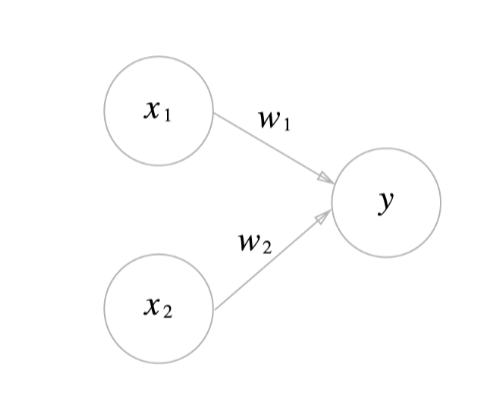

### 1. AND 게이트

In [58]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7       #초기값인 가중치1, 가중치2, 임계값 설정.
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # theta보다 작다면 return 0
        return 0
    elif tmp > theta:   #theta보다 크다면 return 1
        return 1
    

(w1, w2, $\theta$) = (0.5, 0.5, 0.7 ) 이라고 하면 <br>
x1 = 0, x2 = 0 일때 0.5*0 + 0.5*0 = 0     < 0.7 이므로 0 출력 <br>
x1 = 0, x2 = 1 일때 0.5*0 + 0.5*1 = 0.5     < 0.7 이므로 0 출력 <br>
x1 = 1, x2 = 0 일때 0.5*1 + 0.5*0 = 0.5     < 0.7 이므로 0 출력 <br>
x1 = 1, x2 = 1 일때 0.5*1 + 0.5*1 = 1     < 0.7 이므로 0 출력 <br>

In [59]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))


0
0
0
1


### 2. NAND 게이트

In [60]:
def NAND(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7       #초기값인 가중치1, 가중치2, 임계값 설정.
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # theta보다 작다면 return 0
        return 0
    elif tmp > theta:   #theta보다 크다면 return 1
        return 1

### 3. OR 게이트

In [61]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.3       #초기값인 가중치1, 가중치2, 임계값 설정.
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # theta보다 작다면 return 0
        return 0
    elif tmp > theta:   #theta보다 크다면 return 1
        return 1

In [62]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


theta 값을 b라는 편향(bias)로 바꾸는 다른 방식으로 구현

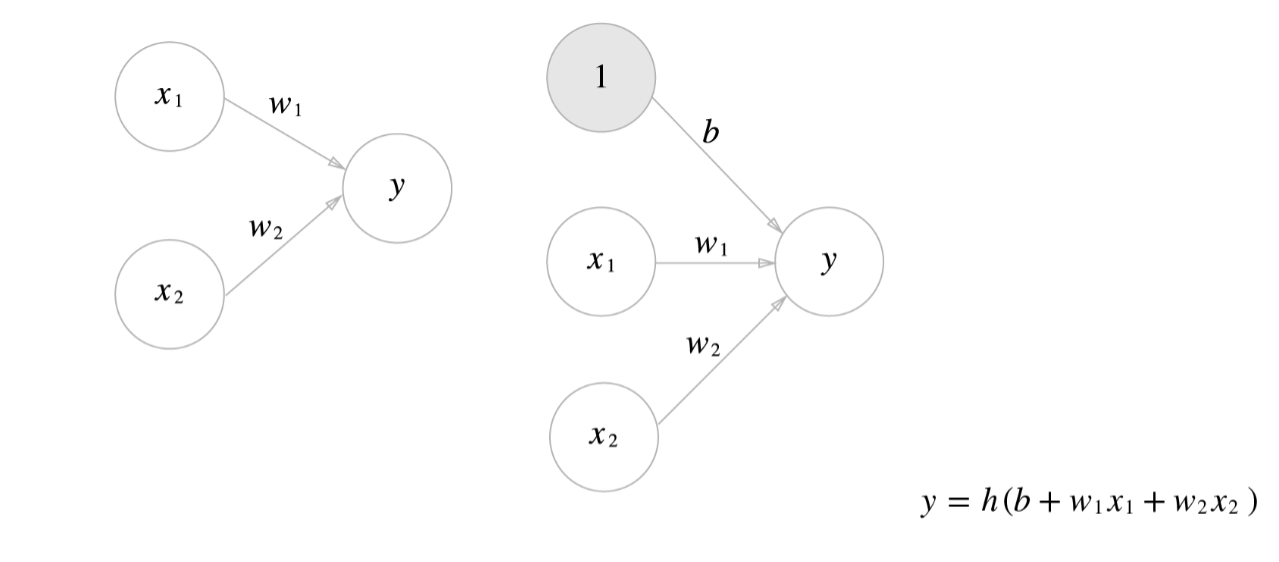

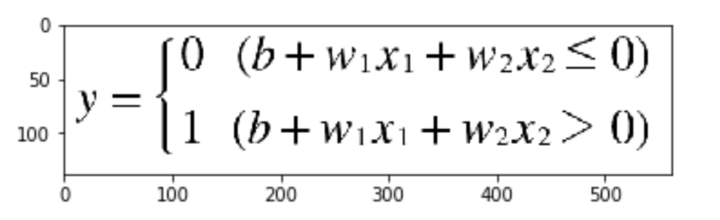

In [63]:
import numpy as np
x = np.array([0, 1])    # x1 = 0, x2 = 1
w = np.array([0.5, 0.5])     # w1 = 0.5, w2 = 0.5
b = -0.7       #편향 = -0.7
w*x     #[0*0.5, 1*0.5]
np.sum(w*x)     #총합 계산

0.5

In [64]:
np.sum(w*x) + b

-0.19999999999999996

In [65]:
def AND(x1, x2):
    x = np.array([x1, x2])      #x1, x2 배열 생성
    w = np.array([0.5, 0.5])        # 가중치 w1 w2 에 0.5eodlq
    b = -0.7        # 편향에 0.7
    tmp = np.sum(w*x) + b       # 활성화 식
    if tmp <= 0:
        return 0        # tmp가 0보다 작으면 0 출력
    else:
        return 1        #tmp가 0보다 크면 1 출력

In [66]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [67]:
def NAND(x1, x2):
    x = np.array([x1, x2])      # x1, x2 배열 생성
    w = np.array([-0.5, -0.5]) # 가중치 w1, w2에 -0.5 대입
    b = 0.7     #편향에 -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [68]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # AND와는 가중치(w와 b)만 다르다.
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [69]:
def XOR(x1, x2):        # 인공지능의 첫번째 겨울 해결
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))


0
1
1
0


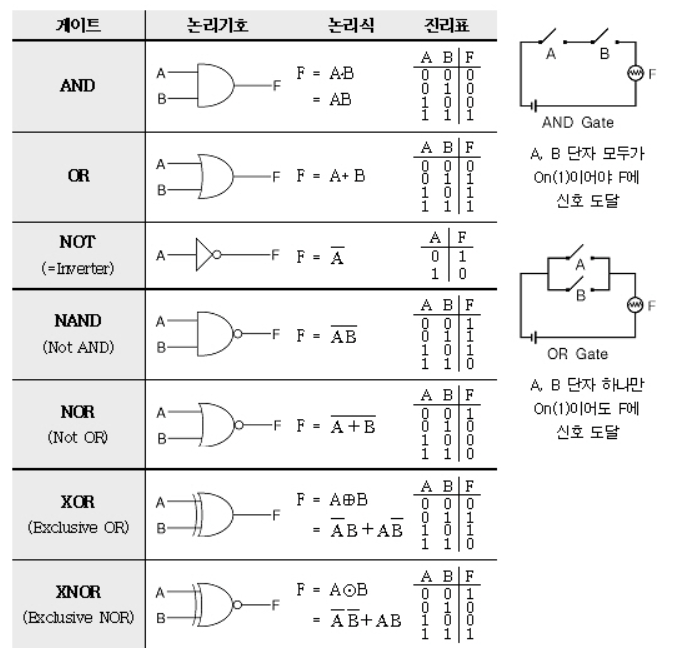

In [70]:
import math

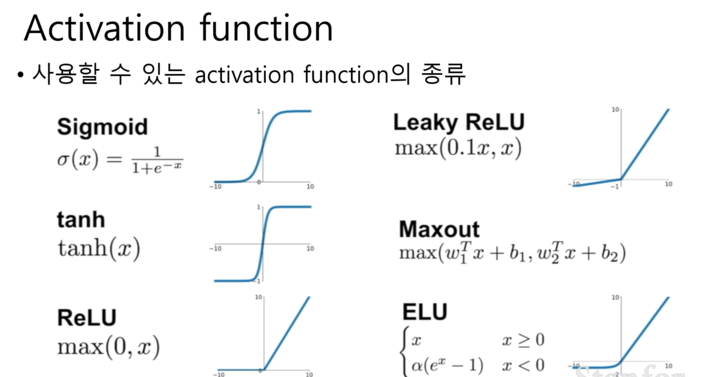

In [71]:
1/(1+math.exp(-1.0))    # 시그모이드함수

0.7310585786300049

In [72]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [73]:
step_function(3.0)

1

In [74]:
step_function(-3.0)

0

In [75]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [76]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [77]:
y = x > 0
y

array([False,  True,  True])

In [82]:
import numpy as np
y = y.astype(np.int64)
y

array([0, 1, 1], dtype=int64)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19676\1576962084.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.1, 1,1)


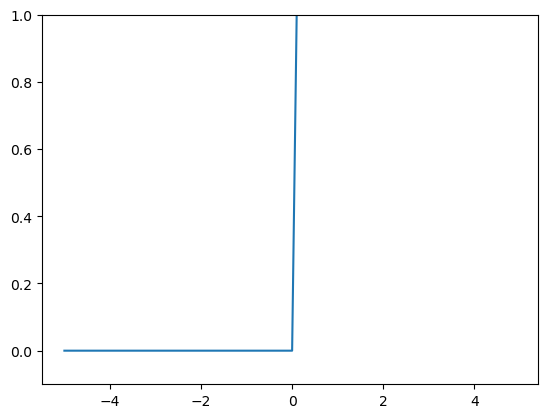

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype = np.int64)     # np.int64
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1,1)
plt.show()

In [85]:
def sigmoid(x):     #인공지능 두번째 겨울의 원인
    return 1 / (1+np.exp(-x))

In [88]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19676\3872703524.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.1, 1,1)     # y축의 범위 지정


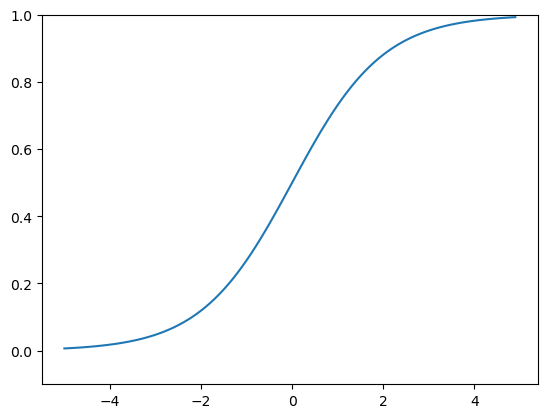

In [89]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1,1)     # y축의 범위 지정
plt.show()

In [90]:
np.arange(-5.0, 5.0, 0.1)

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

### 시그모이드 함수와 계단 함수 비교

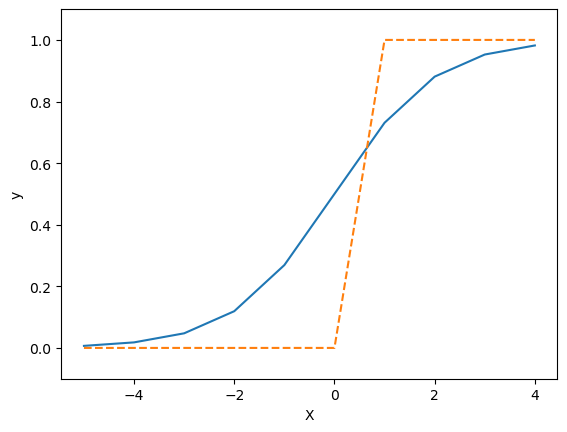

In [92]:
x = np.arange(-5.0, 5.0, 1.0)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label = 'sigmoid')
plt.plot(x, y2, linestyle = '--', label = 'step_function')
plt.xlabel('X')     # x축 이름
plt.ylabel('y')
plt.ylim(-0.1, 1.1)
plt.show()

* 계단 함수는 0을 경계로 출력이 갑자기 바귐
* 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다. 
* 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서 연속적인 실수가 흐릅니다. 
* 둘의 공통점은 
    * 1. 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
    * 2. 출력은 0에서 1사이

In [93]:
def relu(x):
    return np.maximum(0, x)

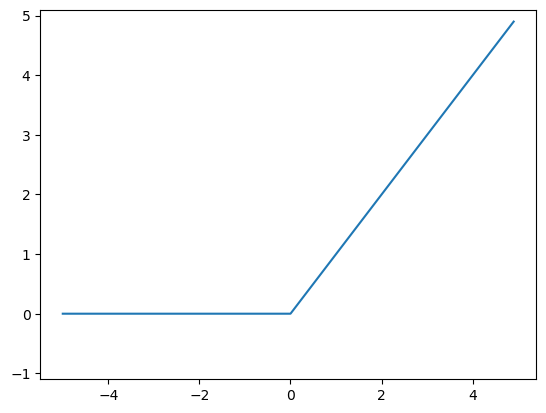

In [94]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1)     # y축의 범위 지정
plt.show()

* ReLu(Rectified Linear Unit, 렐루)는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다. 

## 다차원 배열의 계산

원하는 결과값이 회귀일때 항등함수 사용 <br>
원하는 결과값이 분류일때 소프트맥스 함수 사용

In [95]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))       # 차원의 수
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [96]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [99]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A, B)    # 내적


(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [101]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
np.dot(A, B)


(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [103]:
C = np.array([[1,2], [3,4]])
print(A.shape)
print(C.shape)
np.dot(A, C)    # 첫번째 행렬의 열과 두번째 행렬의 행이 일치하지 않음

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [104]:
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
np.dot(A,B)

(3, 2)
(2,)


array([23, 53, 83])

In [106]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


**3층 신경망 구현하기**
* 입력(2개) -> 1층(3개) -> 2층(2개) -> 출력층(2개)

* 입력층(0층) 2개, 첫번째 은닉층(1층, hidden layer) 3개, 두번째 은닉층(2층, hidden layer) 2개 
* input 이 몇개인지, output이 몇개인지 중요

* 입력층에서 1층으로의 신호전달
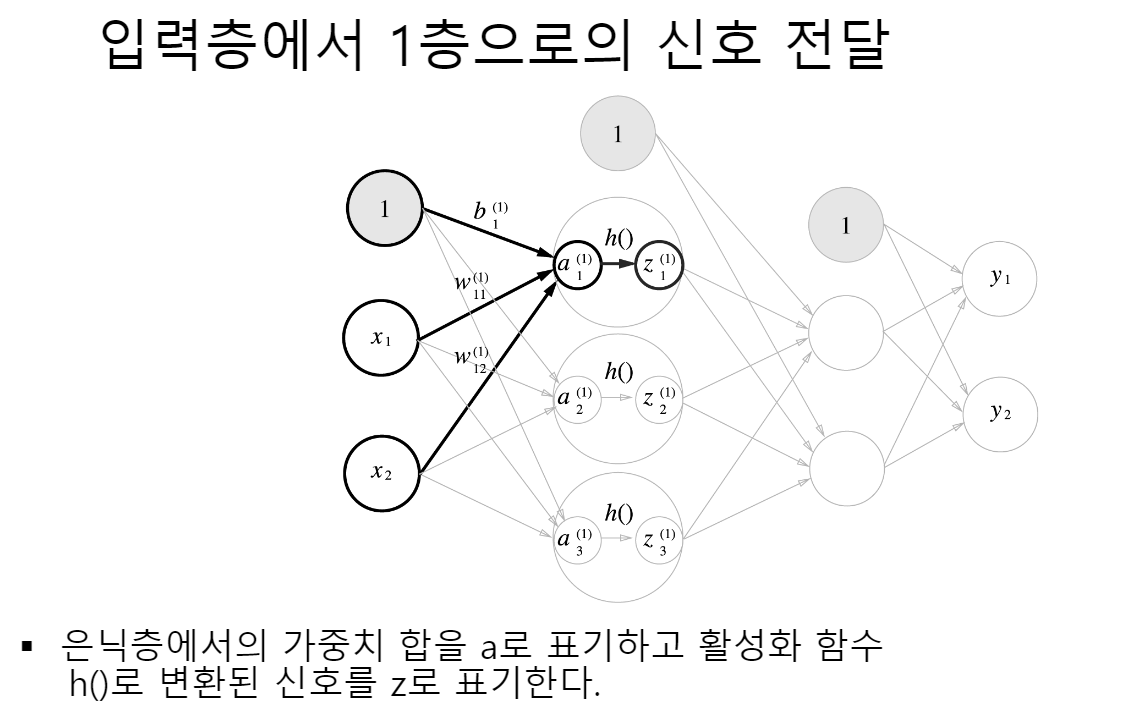

In [109]:
# 1층 3개짜리 구현하기(p.85)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])    # 가중치는 여러개 있지만 편향(bias)는 하나
print(X.shape)
print(W1.shape)
print(B1.shape)
A1 = np.dot(X, W1) + B1

(2,)
(2, 3)
(3,)



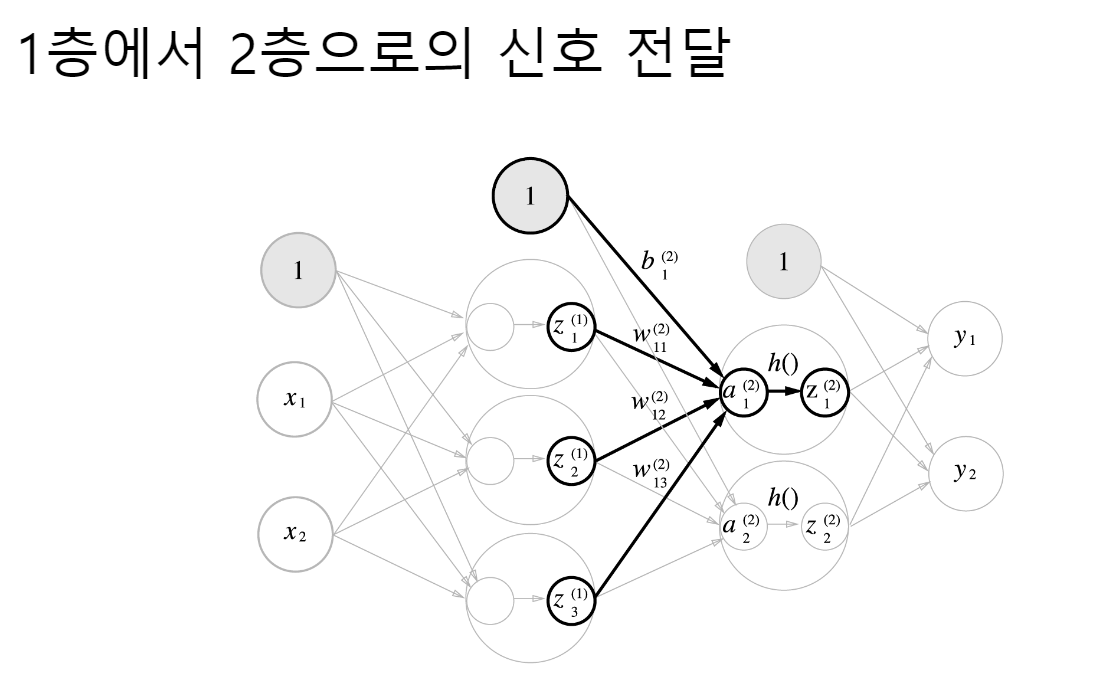

In [111]:
Z1 = sigmoid(A1)    #활성화함수를 시그모이드 함수로 사용

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [112]:
# 1층에서 2층으로의 신경 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
Z1 = sigmoid(A1)    

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [114]:
# 2층에서 출력층으로 신호 전달. 활성화 함수만 지금까지 은닉층과 다름. (항등 함수)
# 2층에서 출력층으로의 신호 전달

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3
print(Y)

[0.31682708 0.69627909]


* 항등 함수 identity_function 정의. 입력을 그대로 출력하는 함수.
* 출력층의 활성화 함수를 다음처럼 표시하여 은닉층의 h()와는 다르게 표시. <br>
$\sigma()$
* 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.
* 회귀 => 항등함수
* 2클래스 분류 => 시그모이드 함수
* 다중 클래스 분류 => 소프트맥스 함수